# Forest Covery Analysis<br>
## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Running the Prediction Algorithms](#section4)<br>
5. [Model evaluation](#section5)<br>

## 1. Problem Statement <a class="anchor" id="section1"></a>

<br>
Given is the dataset containing descriptions of patches of land in the Roosevelt National Forest of Northern Colorado. Objective of this project submission is to predict the integer classification for the forest covery type.<br>
<br>
The seven types are: <br>
1. Spruce/Fir <br>
2. Lodgepole Pine <br>
3. Ponderosa Pine <br>
4. Cottonwood/Willow <br>
5. Aspen <br>
6. Douglas-fir <br>
7. Krummholz

###### Library import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from collections import OrderedDict
from sklearn.model_selection import GridSearchCV


from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image


/home/general/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2. Data loading and Description <a class="anchor" id="section2"></a>
The dataset (15120 observations) contains both features and the Cover_Type. <br><br>
__Data Fields__
1. Elevation - Elevation in meters
2. Aspect - Aspect in degrees azimuth
3. Slope - Slope in degrees
4. Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
5. Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
6. Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
7. Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
8. Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
9. Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
10. Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
11. Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
12. Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
13. Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation
15. The __wilderness__ areas are:
  - 1 - Rawah Wilderness Area
  - 2 - Neota Wilderness Area
  - 3 - Comanche Peak Wilderness Area
  - 4 - Cache la Poudre Wilderness Area
16. The __soil types__ are:
  - 1 Cathedral family - Rock outcrop complex, extremely stony.
  - 2 Vanet - Ratake families complex, very stony.
  - 3 Haploborolis - Rock outcrop complex, rubbly.
  - 4 Ratake family - Rock outcrop complex, rubbly.
  - 5 Vanet family - Rock outcrop complex complex, rubbly.
  - 6 Vanet - Wetmore families - Rock outcrop complex, stony.
  - 7 Gothic family.
  - 8 Supervisor - Limber families complex.
  - 9 Troutville family, very stony.
  - 10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
  - 11 Bullwark - Catamount families - Rock land complex, rubbly.
  - 12 Legault family - Rock land complex, stony.
  - 13 Catamount family - Rock land - Bullwark family complex, rubbly.
  - 14 Pachic Argiborolis - Aquolis complex.
  - 15 unspecified in the USFS Soil and ELU Survey.
  - 16 Cryaquolis - Cryoborolis complex.
  - 17 Gateview family - Cryaquolis complex.
  - 18 Rogert family, very stony.
  - 19 Typic Cryaquolis - Borohemists complex.
  - 20 Typic Cryaquepts - Typic Cryaquolls complex.
  - 21 Typic Cryaquolls - Leighcan family, till substratum complex.
  - 22 Leighcan family, till substratum, extremely bouldery.
  - 23 Leighcan family, till substratum - Typic Cryaquolls complex.
  - 24 Leighcan family, extremely stony.
  - 25 Leighcan family, warm, extremely stony.
  - 26 Granile - Catamount families complex, very stony.
  - 27 Leighcan family, warm - Rock outcrop complex, extremely stony.
  - 28 Leighcan family - Rock outcrop complex, extremely stony.
  - 29 Como - Legault families complex, extremely stony.
  - 30 Como family - Rock land - Legault family complex, extremely stony.
  - 31 Leighcan - Catamount families complex, extremely stony.
  - 32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
  - 33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
  - 34 Cryorthents - Rock land complex, extremely stony.
  - 35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
  - 36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
  - 37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
  - 38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
  - 39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
  - 40 Moran family - Cryorthents - Rock land complex, extremely stony.
  
A brief description of the target variables:
The seven types are: <br>
1. __Spruce/Fir:__ are found in at an elevated region
2. __Lodgepole Pine:__ widest range of environment tolerance. Grows best in moist soils, gentle north facing slope
3. __Ponderosa Pine:__ mainly associated with mountainous topography. However it is found on banks of the Niobara River
4. __Cottonwood/Willow:__ is a large fast growing tree found growing along streams, rivers and lowland areas. It is best used on large properties away from residential areas
5. __Aspen:__ Aspen tree grows all over the world. It generally grows in high-altitude areas above 5,000 feet but also exists at sea level where climate conditions are ideal
6. __Douglas-fir:__ is an evergreen conifer species in the pine family, Pinaceae. It is native to western North America. It grows in the coastal regions from west-central British Columbia southward to central California
7. __Krummholz:__ Krummholz or krumholtz — also called knieholz — is a type of stunted, deformed vegetation encountered in the subarctic and subalpine tree line landscapes, shaped by continual exposure to fierce, freezing winds. Under these conditions, trees can only survive where they are sheltered by rock formations or snow cover

### Importing the dataset

In [2]:
forestcover = pd.read_csv('Forestcover_train.csv')
forestcover.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


###### Drop the Id column

In [3]:
forestcover.drop(columns=['Id'], inplace=True)
forestcover.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


## 3. Exploratory Data Analysis <a class="anchor" id="section3"></a>

#### Check the shape of the dataset

In [4]:
forestcover.shape

(15120, 55)

#### Check the datatypes of the dataset

In [5]:
forestcover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderness_Area1                    15120 non-null  int64
 11  Wilderness_Area2                    15120 non-null  int64
 12  Wild

The data appears to be clean without any null values <br>

#### Check the descriptive statistics of the dataset

In [43]:
forestcover.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000


On looking at anamolies the first one we find is the negative value in Vertical Distance to Hydrology

In [7]:
forestcover[forestcover['Vertical_Distance_To_Hydrology']<0]['Vertical_Distance_To_Hydrology']

1        -6
4        -1
5       -15
16       -1
26       -4
         ..
15101   -22
15102   -23
15103   -10
15104   -33
15108    -6
Name: Vertical_Distance_To_Hydrology, Length: 1139, dtype: int64

I was expecting a very high negative value but the negative values appears to have some meaning.

#### Check the distribution of the Vertical_Distance_To_Hydrology feature

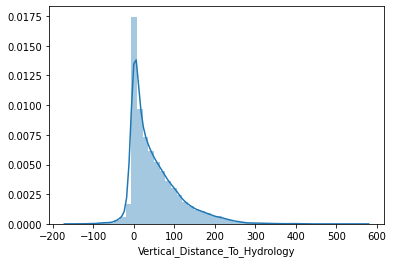

In [8]:
sns.distplot(forestcover['Vertical_Distance_To_Hydrology'])

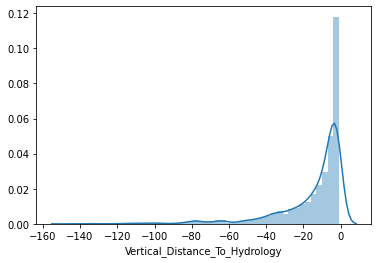

In [9]:
sns.distplot(forestcover[forestcover['Vertical_Distance_To_Hydrology']<0]['Vertical_Distance_To_Hydrology'])

###### Looking the distribution chart above it appears that the negative values have some meaning and we can leave it there

#### Let us look at the distribution of the other variables

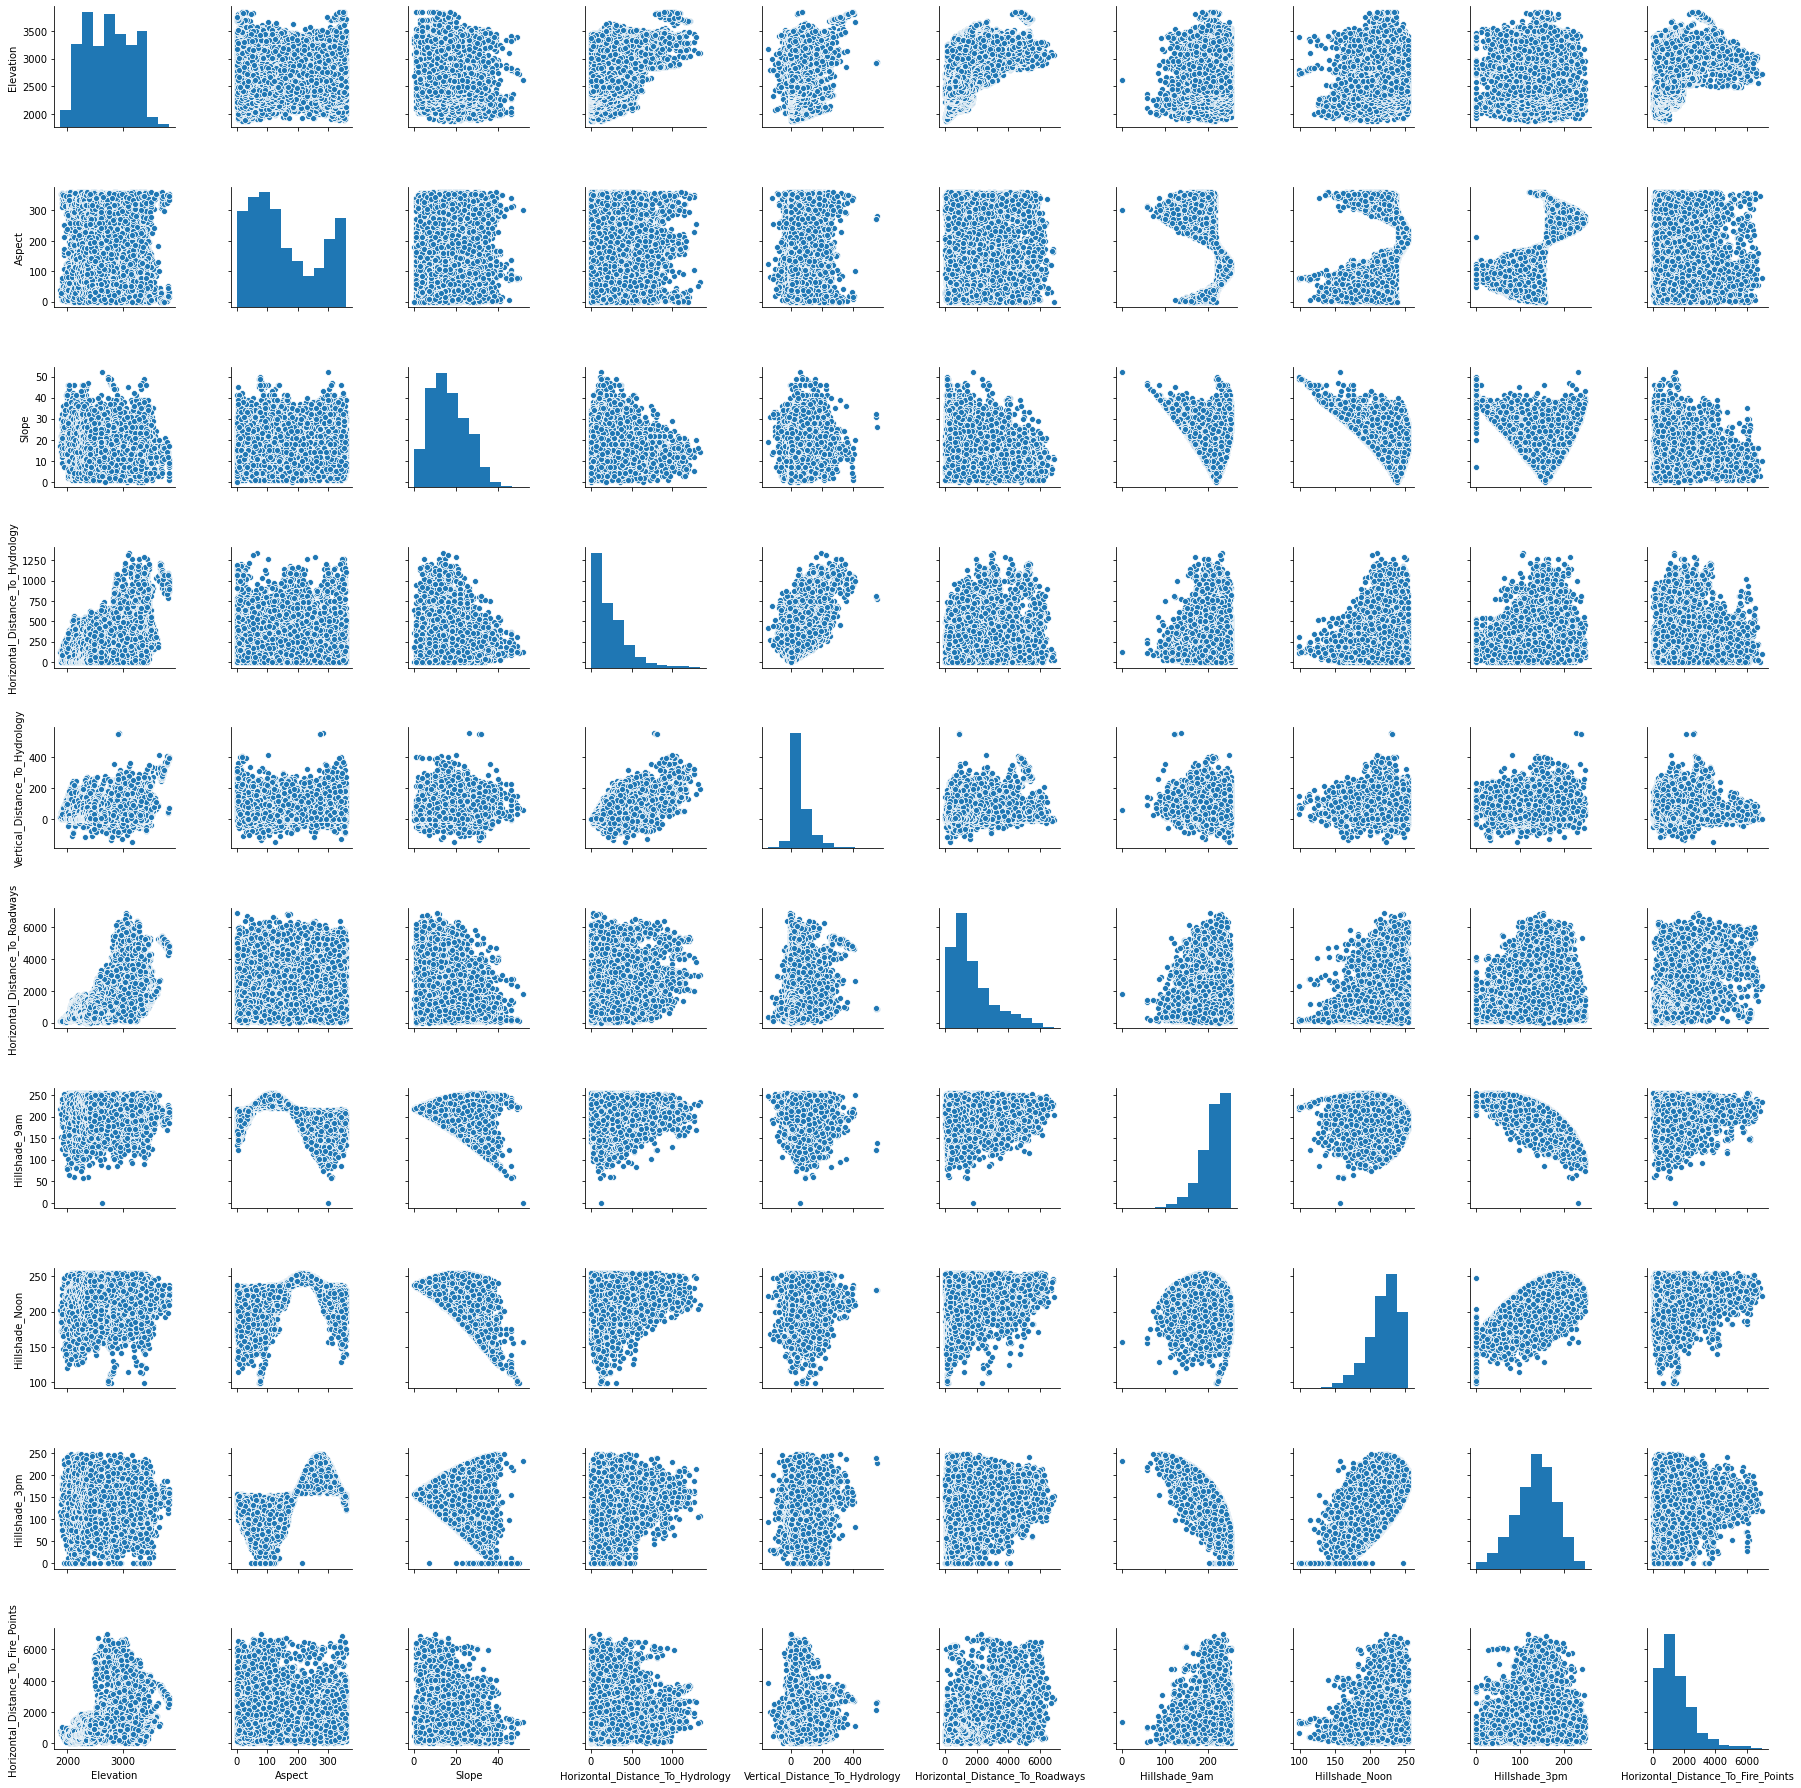

In [13]:
sns.pairplot(forestcover[['Elevation', 'Aspect','Slope','Horizontal_Distance_To_Hydrology',
                          'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                          'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points']])

#### Not all columns are normally distributed. 

#### Find the number of outliers for each column

In [30]:
def find_outlier(dataset, col_name):
    fqr = np.percentile(np.array(dataset[col_name].tolist()),25)
    tqr = np.percentile(np.array(dataset[col_name].tolist()),75)
    iqr = tqr - fqr
    ub = tqr + (3*iqr)
    lb = fqr - (3*iqr)
    ulimit = dataset[dataset[col_name]>ub][col_name].count()
    llimit = dataset[dataset[col_name]<lb][col_name].count()
    return llimit, ulimit

In [37]:
forestcover.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [98]:
num_columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
               'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
               'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
               'Horizontal_Distance_To_Fire_Points']
cat_columns = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4','Soil_Type1',
               'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5','Soil_Type6', 'Soil_Type7', 'Soil_Type8',
               'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
               'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
               'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
               'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
               'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
               'Soil_Type39', 'Soil_Type40']

#### Check the datatype of the columns

In [40]:
cols = forestcover.columns.values

for i,j in zip(range(0, len(cols)), cols):
    if (i >=10):
        forestcover[j] = forestcover[j].astype('category')

In [60]:
forestcover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderness_Area1                    15120 non-null  int64
 11  Wilderness_Area2                    15120 non-null  int64
 12  Wild

#### Look at the distribution of the target variable

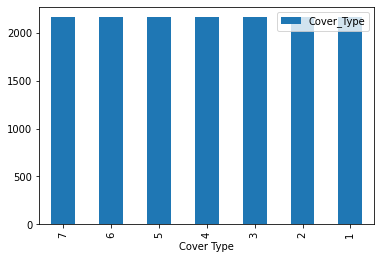

In [49]:
pd.DataFrame(forestcover['Cover_Type'].value_counts()).plot(kind='bar')
plt.xlabel('Cover Type');

### There are 7 classes and it is a balanced dataset

## Let us look at the statistics of the other variables

#### Check the distribution of the forest cover type for each Wilderness Area 

Text(0.5, 0, 'Cover Type')

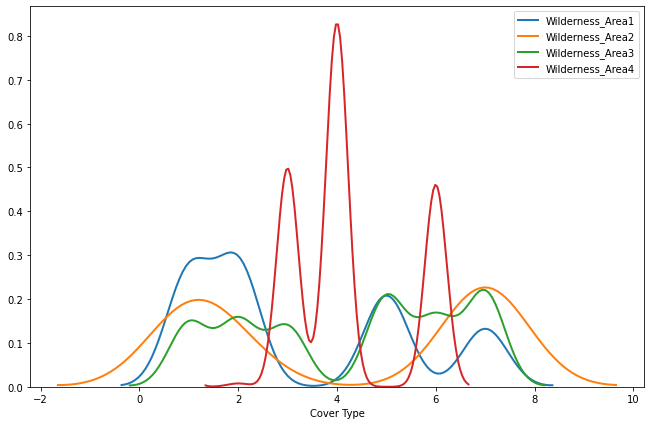

In [104]:
ftrees = forestcover.copy()

# Create a list of wilderness areas
ftrees['Wildernes_Area_Type'] = (ftrees.iloc[:,10:14]==1).idxmax(1)
wild_area = sorted(ftrees['Wildernes_Area_Type'].value_counts().index.tolist())

# for each wilderness area plot the cover type distribution
plt.figure(figsize=(11,7))
for area in wild_area:
    subtree = ftrees[ftrees['Wildernes_Area_Type']==area]
    sns.kdeplot(subtree['Cover_Type'], label=area, linewidth=2)
plt.xlabel('Cover Type')

#### we see a lot of variance of the cover type for the wildernes area

,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15116,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15117,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15118,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


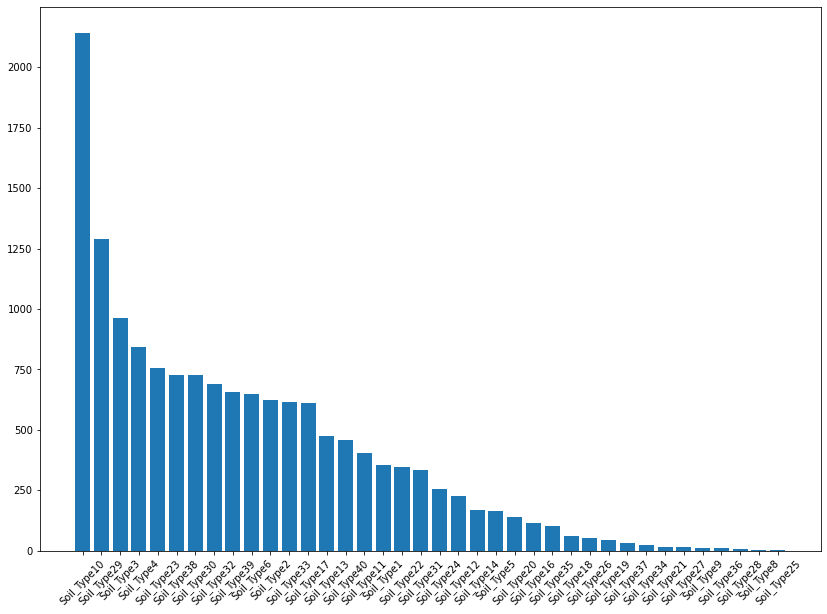

In [80]:
ftrees['Soil_Type'] = (ftrees.iloc[:,14:55]==1).idxmax(1)
plt.figure(figsize=(14,10))
plt.bar(x=ftrees['Soil_Type'].value_counts().index.tolist(), height = ftrees['Soil_Type'].value_counts())
plt.xticks(rotation=45);

#### So Soil_Type 10, 29, 4, 23 to see how the distribution is

Text(0.5, 0, 'Cover Type')

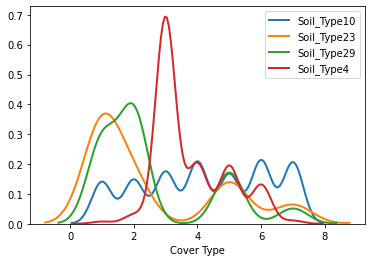

In [105]:
# Create a list of wilderness areas
ftrees['Soil_Type'] = (ftrees.loc[:,['Soil_Type10','Soil_Type29','Soil_Type4', 'Soil_Type23']]==1).idxmax(1)
soil_area = sorted(ftrees['Soil_Type'].value_counts().index.tolist())

# for each wilderness area plot the cover type distribution
for soil in soil_area:
    subtree = ftrees[ftrees['Soil_Type']==soil]
    sns.kdeplot(subtree['Cover_Type'], label=soil, linewidth=2)
plt.xlabel('Cover Type')

### Let us look at the correlation matrix of Continous datatype columns

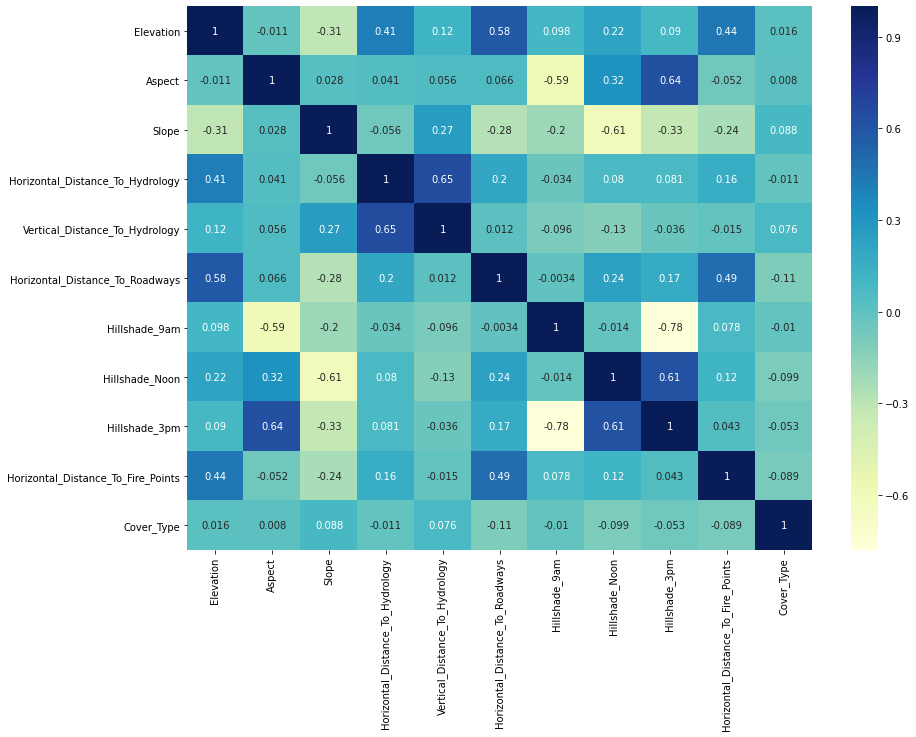

In [97]:
plt.figure(figsize=(14,10))
num_columns.append('Cover_Type')
sns.heatmap(forestcover[num_columns].corr(), annot=True, cmap="YlGnBu")

### Let us look at the correlation matrix of Categorical datatype columns

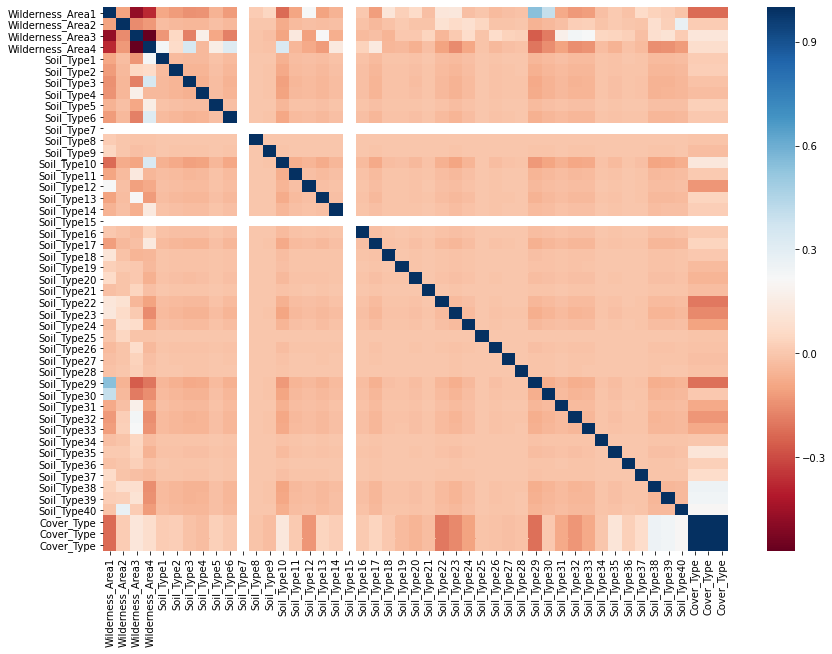

In [101]:
plt.figure(figsize=(14,10))
cat_columns.append('Cover_Type')
sns.heatmap(forestcover[cat_columns].corr(), annot=False, cmap="RdBu")

#### we see a lot of variance of the cover type for the Soil Type also. Making this too an important column

# Findings from Exploratory Data Analysis

- Data set is balanced with equal distribution of data across each of the cover types
- Wilderness Area is able to explain the cover type to a good extent
- from the KDE plot we can make out that Cover Type 4  is mostly present in Wilderness Area 4, and apart from 7, 8 all the other trees are present in other wilderness areas
- There is strong correlation between few Soil Types(as show in KDE plot) and Cover type
- We see from the Correlation Matrix Soil Type 7 and Soil Type 15 are blank, that means the columns have all zeros and is not important
- From the correlation matrix of the numeric column Hillshade column are collinear and Hillshade 9 AM has value close to 0, so that is also not important

# Check for categorical variables

In [14]:
print(forestcover.select_dtypes(include='category').dtypes)
print(forestcover.select_dtypes(include='int').dtypes)

Wilderness_Area1    category
Wilderness_Area2    category
Wilderness_Area3    category
Wilderness_Area4    category
Soil_Type1          category
Soil_Type2          category
Soil_Type3          category
Soil_Type4          category
Soil_Type5          category
Soil_Type6          category
Soil_Type7          category
Soil_Type8          category
Soil_Type9          category
Soil_Type10         category
Soil_Type11         category
Soil_Type12         category
Soil_Type13         category
Soil_Type14         category
Soil_Type15         category
Soil_Type16         category
Soil_Type17         category
Soil_Type18         category
Soil_Type19         category
Soil_Type20         category
Soil_Type21         category
Soil_Type22         category
Soil_Type23         category
Soil_Type24         category
Soil_Type25         category
Soil_Type26         category
Soil_Type27         category
Soil_Type28         category
Soil_Type29         category
Soil_Type30         category
Soil_Type31   

## 4. Running the Prediction Algorithms <a class="anchor" id="section4"></a>

In [109]:
dataset = forestcover.copy()
# Extract the target and dependent variables
X = dataset.loc[:, dataset.columns!='Cover_Type']
y = dataset.loc[:, dataset.columns=='Cover_Type']
print(X.shape)
print(y.shape)

(15120, 54)
(15120, 1)


#### There are too many predictors in the dataset 
- In order to minimize our task of manually comparing each of the predictors to identify the most significant, we can perform dimensionality reduction using PCA

- Before we can use PCA on the dataset we need to standardize the data and then normalize the data

In [110]:
# Split the dataset
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12096, 54)
(12096, 1)
(3024, 54)
(3024, 1)


### Function to Scale the dataset

In [111]:
# Scale the Train dataset
def scale_the_train_dataset(dataset):
    dataset1 = dataset.iloc[:,0:10].values
    dataset2 = dataset.iloc[:,10:].values
    sc = StandardScaler()
    dataset1_scaled = sc.fit_transform(dataset1)
    dataset_scaled = np.concatenate((dataset1_scaled, dataset2), axis=1)
    return sc, dataset_scaled

# Scale the Train dataset
def scale_the_test_dataset(dataset, sc_obj):
    dataset1 = dataset.iloc[:,0:10].values
    dataset2 = dataset.iloc[:,10:].values
    sc = sc_obj
    dataset1_scaled = sc.transform(dataset1)
    dataset_scaled = np.concatenate((dataset1_scaled, dataset2), axis=1)
    return dataset_scaled

In [112]:
# Perform PCA on train dataset
def perform_pca_train(dataset, n):
    pca = PCA(n).fit(dataset)
    n_comp = pca.n_components_
    print(pca.explained_variance_ratio_)
    print(np.cumsum(pca.explained_variance_ratio_))
    plt.plot(np.round(np.cumsum(pca.explained_variance_ratio_),decimals=3)*100)
    print('No. of components: ', n_comp)
    pca = PCA(n_components=n_comp).fit(dataset)
    dataset_pca = pca.transform(dataset)
    return pca, dataset_pca

# Perform PCA on test dataset
def perform_pca_test(dataset, pca_obj):
    pca = pca_obj
    dataset_pca = pca.transform(dataset)
    return dataset_pca

### Training the dataset using Random Forest Regressor

### Train and predict the outputs

In [113]:
def train_predict(train_data, train_classfiers, test_data, algorithm):
    model = algorithm
    model.fit(train_data, train_classfiers)
    train_prediction = model.predict(train_data)
    test_prediction = model.predict(test_data)
    return train_prediction, test_prediction

In [115]:
def model_evaluation(actuals, predictions, algorithm):
    # Confusion matrix
    conf_matrix = pd.DataFrame(confusion_matrix(actuals, predictions))
    print("\n ",algorithm )
    print("CONFUSION MATRIX")
    print(conf_matrix)
    
    # Mean absolute error
    mae = round(metrics.mean_absolute_error(actuals, predictions),2)
    print('Mean Absolute Error: {}'.format(mae))
    
    # Mean Squared Error
    mse = round(metrics.mean_squared_error(actuals, predictions),2)
    print('Mean Squaared Error: {}'.format(mse))
    
    # Root Mean Square Error
    rmse = round(np.sqrt(mse),2)
    print('Root Mean Squaared Error: {}'.format(rmse))
    
    # Accuracy
    accuracy = round(accuracy_score(actuals, predictions),2)
    print('Accuracy: {}'.format(accuracy))
    
    # Precision score
    precision = round(metrics.precision_score(actuals, predictions, average='macro'),2)
    print('Precision : {}'.format(precision))
    
    # Recall score
    recall = round(metrics.recall_score(actuals, predictions, average='macro'),2)
    print('Recall : {}'.format(recall))
    
    f1 = round(metrics.fbeta_score(actuals, predictions, average='macro', beta=2),2)
    print('F1_score : {}'.format(f1))
    
    
    alg = algorithm
    df = pd.DataFrame(data=[{'Algorithm': alg, 'MAE':mae, 'MSE':mse, 'RMSE':rmse,
                            'Accuracy':accuracy, 'Precision':precision, 'Recall':recall, 'F1_Score':f1}])
        
    return df[['Algorithm', 'MAE', 'MSE', 'RMSE', 'Accuracy', 'Precision', 'Recall', 'F1_Score']]

### Scaling the dataset

In [116]:
sc, X_scaled_train = scale_the_train_dataset(X_train)
X_scaled_test = scale_the_test_dataset(X_test, sc)
print(X_scaled_test.shape)
print(X_scaled_train.shape)

(3024, 54)
(12096, 54)


### Create a results array to store the results of each algorithm

In [122]:
results = pd.DataFrame(columns=['Algorithm','MAE', 'MSE', 'RMSE', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

# Run the algorithm on the classification

In [123]:
dtree = DecisionTreeClassifier()
y_pred_train, y_pred_test = train_predict(X_scaled_train, y_train, X_scaled_test, dtree)
results_dtree = model_evaluation(y_test, y_pred_test, 'DTree without PCA Test')
results = results.append(results_dtree, ignore_index=True)
results_dtree = model_evaluation(y_train, y_pred_train, 'DTree without PCA Train')
results = results.append(results_dtree, ignore_index=True)


  DTree without PCA Test
CONFUSION MATRIX
     0    1    2    3    4    5    6
0  285  103    0    0    9    0   34
1   72  291    8    0   35    7    5
2    2   15  324   34   11   60    0
3    0    0   23  371    0   12    0
4    3   39    6    0  407    4    0
5    4   11   64   18    7  332    0
6   40    8    0    0    0    0  380
Mean Absolute Error: 0.53
Mean Squaared Error: 1.92
Root Mean Squaared Error: 1.39
Accuracy: 0.79
Precision : 0.79
Recall : 0.79
F1_score : 0.79

  DTree without PCA Train
CONFUSION MATRIX
      0     1     2     3     4     5     6
0  1729     0     0     0     0     0     0
1     0  1742     0     0     0     0     0
2     0     0  1714     0     0     0     0
3     0     0     0  1754     0     0     0
4     0     0     0     0  1701     0     0
5     0     0     0     0     0  1724     0
6     0     0     0     0     0     0  1732
Mean Absolute Error: 0.0
Mean Squaared Error: 0.0
Root Mean Squaared Error: 0.0
Accuracy: 1.0
Precision : 1.0
Recall : 1

### Running Decision Tree algorithm with PCA

### Performing PCA on the scaled dataset

[0.25486752 0.20577061 0.15825945 0.09499061 0.05160903 0.04329615
 0.0389002  0.02855524 0.02243614 0.02114027 0.0106846  0.0073997
 0.00535029 0.00461475 0.00423239 0.004022   0.00388775 0.00363838
 0.00359783 0.00342784 0.00322995 0.00297081 0.00248819 0.00232584
 0.00213089 0.00206846 0.0019805  0.001789   0.00162352]
[0.25486752 0.46063813 0.61889759 0.7138882  0.76549723 0.80879337
 0.84769358 0.87624882 0.89868495 0.91982523 0.93050982 0.93790952
 0.94325981 0.94787456 0.95210695 0.95612896 0.96001671 0.96365509
 0.96725292 0.97068076 0.97391071 0.97688152 0.9793697  0.98169554
 0.98382643 0.9858949  0.9878754  0.9896644  0.99128792]
No. of components:  29


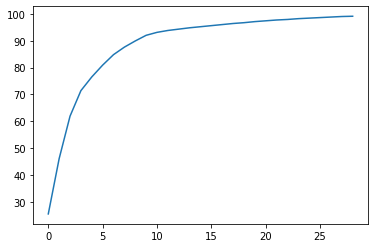

In [124]:
pca, X_pca_scaled_train = perform_pca_train(X_scaled_train, 0.99)
X_pca_scaled_test = perform_pca_test(X_scaled_test, pca)

###### Run the Decision Tree algorithm on the PCA dataset

In [125]:
dtree_pca = DecisionTreeClassifier()
y_pca_pred_train, y_pca_pred_test = train_predict(X_pca_scaled_train, y_train, X_pca_scaled_test, dtree_pca)
results_dtree_pca = model_evaluation(y_test, y_pca_pred_test, 'DTree_PCA Test')
results = results.append(results_dtree_pca, ignore_index=True)
results_dtree_pca = model_evaluation(y_train, y_pca_pred_train, 'DTree_PCA Train')
results = results.append(results_dtree_pca, ignore_index=True)


  DTree_PCA Test
CONFUSION MATRIX
     0    1    2    3    4    5    6
0  260  102    7    0   17    1   44
1   98  247   10    0   43   14    6
2    3   14  292   46   12   79    0
3    0    3   30  354    0   19    0
4   13   42    7    1  388    8    0
5    2   12   79   24    7  312    0
6   36    7    0    0    0    0  385
Mean Absolute Error: 0.65
Mean Squaared Error: 2.31
Root Mean Squaared Error: 1.52
Accuracy: 0.74
Precision : 0.74
Recall : 0.74
F1_score : 0.74

  DTree_PCA Train
CONFUSION MATRIX
      0     1     2     3     4     5     6
0  1729     0     0     0     0     0     0
1     0  1742     0     0     0     0     0
2     0     0  1714     0     0     0     0
3     0     0     0  1754     0     0     0
4     0     0     0     0  1701     0     0
5     0     0     0     0     0  1724     0
6     0     0     0     0     0     0  1732
Mean Absolute Error: 0.0
Mean Squaared Error: 0.0
Root Mean Squaared Error: 0.0
Accuracy: 1.0
Precision : 1.0
Recall : 1.0
F1_score : 1.

In [126]:
results

,Algorithm,MAE,MSE,RMSE,Accuracy,Precision,Recall,F1_Score
0,DTree without PCA Test,0.53,1.92,1.39,0.79,0.79,0.79,0.79
1,DTree without PCA Train,0.00,0.00,0.00,1.00,1.00,1.00,1.00
2,DTree_PCA Test,0.65,2.31,1.52,0.74,0.74,0.74,0.74
3,DTree_PCA Train,0.00,0.00,0.00,1.00,1.00,1.00,1.00


# Correcting the overfitting

### Using GridsearchCV

In [127]:
tree_param = [{'criterion':['gini', 'entropy'],
               'max_features':['sqrt','log2', None],
               'max_depth': [30,31,32,33,34,35],
               'min_samples_split': [10]
               }]

In [128]:
dtree_gscv = DecisionTreeClassifier()
grid_search = GridSearchCV(dtree_gscv, tree_param, cv=10)

y_pred_train, y_pred_test = train_predict(X_scaled_train, y_train, X_scaled_test, grid_search)
results_dtree_gscv = model_evaluation(y_test, y_pred_test, 'DTree_without_PCA GSCV Test')
results = results.append(results_dtree_gscv, ignore_index=True)
results_dtree_gscv = model_evaluation(y_train, y_pred_train, 'DTree_without_PCA GSCV Train')
results = results.append(results_dtree_gscv, ignore_index=True)


  DTree_without_PCA GSCV Test
CONFUSION MATRIX
     0    1    2    3    4    5    6
0  288  100    0    0    8    1   34
1   74  292    7    0   35    6    4
2    0   16  318   37    8   67    0
3    0    0   21  372    0   13    0
4    7   35    5    0  407    5    0
5    4    8   80   18    4  322    0
6   40    7    0    0    0    0  381
Mean Absolute Error: 0.54
Mean Squaared Error: 1.96
Root Mean Squaared Error: 1.4
Accuracy: 0.79
Precision : 0.79
Recall : 0.79
F1_score : 0.79

  DTree_without_PCA GSCV Train
CONFUSION MATRIX
      0     1     2     3     4     5     6
0  1587    91     1     0    14     3    33
1   124  1554    14     0    30    12     8
2     0    19  1600    24     8    63     0
3     0     0    21  1721     0    12     0
4    13    39    14     0  1628     7     0
5     6    12    81    16     3  1606     0
6    26    11     0     0     0     0  1695
Mean Absolute Error: 0.14
Mean Squaared Error: 0.5
Root Mean Squaared Error: 0.71
Accuracy: 0.94
Precision : 0.

In [130]:
results

,Algorithm,MAE,MSE,RMSE,Accuracy,Precision,Recall,F1_Score
0,DTree without PCA Test,0.53,1.92,1.39,0.79,0.79,0.79,0.79
1,DTree without PCA Train,0.00,0.00,0.00,1.00,1.00,1.00,1.00
2,DTree_PCA Test,0.65,2.31,1.52,0.74,0.74,0.74,0.74
3,DTree_PCA Train,0.00,0.00,0.00,1.00,1.00,1.00,1.00
4,DTree_without_PCA GSCV Test,0.54,1.96,1.40,0.79,0.79,0.79,0.79
5,DTree_without_PCA GSCV Train,0.14,0.50,0.71,0.94,0.94,0.94,0.94


In [43]:
dtree_pca_gscv = DecisionTreeClassifier()
grid_search_pca = GridSearchCV(dtree_pca_gscv, tree_param, cv=10)

y_pca_gscv_pred_train, y_pca_gscv_pred_test = train_predict(X_pca_scaled_train, y_train,
                                                            X_pca_scaled_test, grid_search_pca)
results_dtree_pca_gscv_test = model_evaluation(y_test, y_pca_gscv_pred_test, 'DTree GSCV PCA Test')
results_dtree_pca_gscv_train = model_evaluation(y_train, y_pca_gscv_pred_train, 'DTree GSCV PCA Train')
results = results.append(results_dtree_pca_gscv_test, ignore_index=True)
results = results.append(results_dtree_pca_gscv_train, ignore_index=True)
results



CONFUSION MATRIX
     0    1    2    3    4    5    6
0  289  102    4    1   12    2   39
1  107  232   10    0   46   18    5
2    2   11  303   27   13   80    0
3    0    1   29  390    0   26    0
4   10   31    7    0  358    8    0
5    4   16   80   14    8  288    0
6   28    6    2    1    0    0  414
Mean Absolute Error: 0.62
Mean Squaared Error: 2.14
Root Mean Squaared Error: 1.46
Accuracy: 0.75
Precision : 0.75
Recall : 0.75
F1_score : 0.75


CONFUSION MATRIX
      0     1     2     3     4     5     6
0  1711     0     0     0     0     0     0
1     0  1742     0     0     0     0     0
2     0     0  1724     0     0     0     0
3     0     0     0  1714     0     0     0
4     0     0     0     0  1746     0     0
5     0     0     0     0     0  1750     0
6     0     0     0     0     0     0  1709
Mean Absolute Error: 0.0
Mean Squaared Error: 0.0
Root Mean Squaared Error: 0.0
Accuracy: 1.0
Precision : 1.0
Recall : 1.0
F1_score : 1.0


,Algorithm,MAE,MSE,RMSE,Accuracy,Precision,Recall,F1_Score
0,DTree without PCA Test,0.54,1.89,1.37,0.79,0.78,0.79,0.78
1,DTree without PCA Train,0.00,0.00,0.00,1.00,1.00,1.00,1.00
2,DTree_PCA Test,0.65,2.26,1.50,0.74,0.74,0.74,0.74
3,DTree_PCA Train,0.00,0.00,0.00,1.00,1.00,1.00,1.00
4,DTree_without_PCA GSCV Test,0.53,1.89,1.37,0.79,0.79,0.79,0.79
5,DTree_without_PCA GSCV Train,0.00,0.00,0.00,1.00,1.00,1.00,1.00
6,DTree GSCV PCA Test,0.62,2.14,1.46,0.75,0.75,0.75,0.75
7,DTree GSCV PCA Train,0.00,0.00,0.00,1.00,1.00,1.00,1.00


# Training the dataset using Random Forest Regressor with PCA

In [131]:
rfc = RandomForestClassifier()
y_pred_train, y_pred_test = train_predict(X_scaled_train, y_train, X_scaled_test, rfc)
results_rfc = model_evaluation(y_test, y_pred_test, 'RFC Test')
results = results.append(results_rfc, ignore_index=True)
results_rfc = model_evaluation(y_train, y_pred_train, 'RFC Train')
results = results.append(results_rfc, ignore_index=True)

/home/general/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until



  RFC Test
CONFUSION MATRIX
     0    1    2    3    4    5    6
0  328   67    0    0   13    1   22
1   58  313    6    0   33    8    0
2    0    4  351   33    6   52    0
3    0    0   11  390    0    5    0
4    0   12    5    0  435    7    0
5    0    3   39   21    4  369    0
6   13    1    0    0    0    0  414
Mean Absolute Error: 0.33
Mean Squaared Error: 1.08
Root Mean Squaared Error: 1.04
Accuracy: 0.86
Precision : 0.86
Recall : 0.86
F1_score : 0.86

  RFC Train
CONFUSION MATRIX
      0     1     2     3     4     5     6
0  1728     0     0     0     0     0     1
1     0  1742     0     0     0     0     0
2     0     0  1714     0     0     0     0
3     0     0     0  1754     0     0     0
4     0     0     0     0  1701     0     0
5     0     0     0     0     0  1724     0
6     0     0     0     0     0     0  1732
Mean Absolute Error: 0.0
Mean Squaared Error: 0.0
Root Mean Squaared Error: 0.0
Accuracy: 1.0
Precision : 1.0
Recall : 1.0
F1_score : 1.0


In [132]:
results

,Algorithm,MAE,MSE,RMSE,Accuracy,Precision,Recall,F1_Score
0,DTree without PCA Test,0.53,1.92,1.39,0.79,0.79,0.79,0.79
1,DTree without PCA Train,0.00,0.00,0.00,1.00,1.00,1.00,1.00
2,DTree_PCA Test,0.65,2.31,1.52,0.74,0.74,0.74,0.74
3,DTree_PCA Train,0.00,0.00,0.00,1.00,1.00,1.00,1.00
4,DTree_without_PCA GSCV Test,0.54,1.96,1.40,0.79,0.79,0.79,0.79
5,DTree_without_PCA GSCV Train,0.14,0.50,0.71,0.94,0.94,0.94,0.94
6,RFC Test,0.33,1.08,1.04,0.86,0.86,0.86,0.86
7,RFC Train,0.00,0.00,0.00,1.00,1.00,1.00,1.00


In [133]:
rfc_pca = RandomForestClassifier()
y_pca_pred_train, y_pca_pred_test = train_predict(X_pca_scaled_train, y_train, X_pca_scaled_test, rfc_pca)
results_rfc = model_evaluation(y_test, y_pca_pred_test, 'RFC PCA Test')
results = results.append(results_rfc, ignore_index=True)
results_rfc = model_evaluation(y_train, y_pca_pred_train, 'RFC PCA Train')
results = results.append(results_rfc, ignore_index=True)

/home/general/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until



  RFC PCA Test
CONFUSION MATRIX
     0    1    2    3    4    5    6
0  320   73    0    0   13    1   24
1   66  303    7    0   34    7    1
2    0    4  326   47    7   62    0
3    0    0   15  383    0    8    0
4    0   23    7    0  423    6    0
5    0    3   43   21    3  366    0
6   15    1    0    0    0    0  412
Mean Absolute Error: 0.38
Mean Squaared Error: 1.22
Root Mean Squaared Error: 1.1
Accuracy: 0.84
Precision : 0.84
Recall : 0.84
F1_score : 0.84

  RFC PCA Train
CONFUSION MATRIX
      0     1     2     3     4     5     6
0  1729     0     0     0     0     0     0
1     0  1742     0     0     0     0     0
2     0     0  1714     0     0     0     0
3     0     0     0  1754     0     0     0
4     0     0     0     0  1701     0     0
5     0     0     0     0     0  1724     0
6     0     0     0     0     0     0  1732
Mean Absolute Error: 0.0
Mean Squaared Error: 0.0
Root Mean Squaared Error: 0.0
Accuracy: 1.0
Precision : 1.0
Recall : 1.0
F1_score : 1.0


In [134]:
results

,Algorithm,MAE,MSE,RMSE,Accuracy,Precision,Recall,F1_Score
0,DTree without PCA Test,0.53,1.92,1.39,0.79,0.79,0.79,0.79
1,DTree without PCA Train,0.00,0.00,0.00,1.00,1.00,1.00,1.00
2,DTree_PCA Test,0.65,2.31,1.52,0.74,0.74,0.74,0.74
3,DTree_PCA Train,0.00,0.00,0.00,1.00,1.00,1.00,1.00
4,DTree_without_PCA GSCV Test,0.54,1.96,1.40,0.79,0.79,0.79,0.79
5,DTree_without_PCA GSCV Train,0.14,0.50,0.71,0.94,0.94,0.94,0.94
6,RFC Test,0.33,1.08,1.04,0.86,0.86,0.86,0.86
7,RFC Train,0.00,0.00,0.00,1.00,1.00,1.00,1.00
8,RFC PCA Test,0.38,1.22,1.10,0.84,0.84,0.84,0.84
9,RFC PCA Train,0.00,0.00,0.00,1.00,1.00,1.00,1.00


In [143]:
rfc_param = [{'n_estimators':range(10,15),
              'criterion':['gini', 'entropy'],
              'max_depth': [30,32,35],
              'max_features': ['sqrt','log2', None]}]

In [144]:
rfc_gscv = RandomForestClassifier()
grid_search = GridSearchCV(rfc_gscv, rfc_param, cv=10)

y_gscv_pred_train, y_gscv_pred_test = train_predict(X_scaled_train, y_train,
                                                    X_scaled_test, grid_search)
results_rfc_gscv_test = model_evaluation(y_test, y_gscv_pred_test, 'RFC GSCV Test')
results_rfc_gscv_train = model_evaluation(y_train, y_pca_gscv_pred_train, 'RFC GSCV Train')
results = results.append(results_rfc_gscv_test, ignore_index=True)
results = results.append(results_rfc_gscv_train, ignore_index=True)
results

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataCon

/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/general/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)



  RFC GSCV Test
CONFUSION MATRIX
     0    1    2    3    4    5    6
0  330   66    0    0    9    1   25
1   72  288    7    0   40   10    1
2    0   11  346   29    7   53    0
3    0    0   20  381    0    5    0
4    0   12    2    0  442    3    0
5    0    6   51   14    6  359    0
6   15    1    0    0    1    0  411
Mean Absolute Error: 0.36
Mean Squaared Error: 1.21
Root Mean Squaared Error: 1.1
Accuracy: 0.85
Precision : 0.84
Recall : 0.85
F1_score : 0.84


NameError: name 'y_pca_gscv_pred_train' is not defined

## 5. Model evaluation <a class="anchor" id="section5"></a>

In [141]:
results

,Algorithm,MAE,MSE,RMSE,Accuracy,Precision,Recall,F1_Score
0,DTree without PCA Test,0.53,1.92,1.39,0.79,0.79,0.79,0.79
1,DTree without PCA Train,0.00,0.00,0.00,1.00,1.00,1.00,1.00
2,DTree_PCA Test,0.65,2.31,1.52,0.74,0.74,0.74,0.74
3,DTree_PCA Train,0.00,0.00,0.00,1.00,1.00,1.00,1.00
4,DTree_without_PCA GSCV Test,0.54,1.96,1.40,0.79,0.79,0.79,0.79
5,DTree_without_PCA GSCV Train,0.14,0.50,0.71,0.94,0.94,0.94,0.94
6,RFC Test,0.33,1.08,1.04,0.86,0.86,0.86,0.86
7,RFC Train,0.00,0.00,0.00,1.00,1.00,1.00,1.00
8,RFC PCA Test,0.38,1.22,1.10,0.84,0.84,0.84,0.84
9,RFC PCA Train,0.00,0.00,0.00,1.00,1.00,1.00,1.00


## 6. Conclusion <a class="anchor" id="section5"></a>